In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('bmw.csv')

In [4]:
print(data.head())

       model  year  price transmission  mileage fuelType  tax   mpg  \
0   5 Series  2014  11200    Automatic    67068   Diesel  125  57.6   
1   6 Series  2018  27000    Automatic    14827   Petrol  145  42.8   
2   5 Series  2016  16000    Automatic    62794   Diesel  160  51.4   
3   1 Series  2017  12750    Automatic    26676   Diesel  145  72.4   
4   7 Series  2014  14500    Automatic    39554   Diesel  160  50.4   

   engineSize  
0         2.0  
1         2.0  
2         3.0  
3         1.5  
4         3.0  


In [5]:
# exploring the correlation between the price and the rest of the numerical features
corr_matrix = data[['price', 'year', 'mileage', 'tax', 'mpg', 'engineSize']].corr()
corr_matrix = corr_matrix.drop('price')
print(corr_matrix['price'])

year          0.623756
mileage      -0.605397
tax           0.263484
mpg          -0.204882
engineSize    0.460196
Name: price, dtype: float64


In [6]:
# It can be observed that the year has a strong positive correlation with the price, while mileage, tax, and mpg have negative correlations with the price. This indicates that newer cars tend to be more expensive, while cars with higher mileage, tax, and mpg tend to be less expensive.

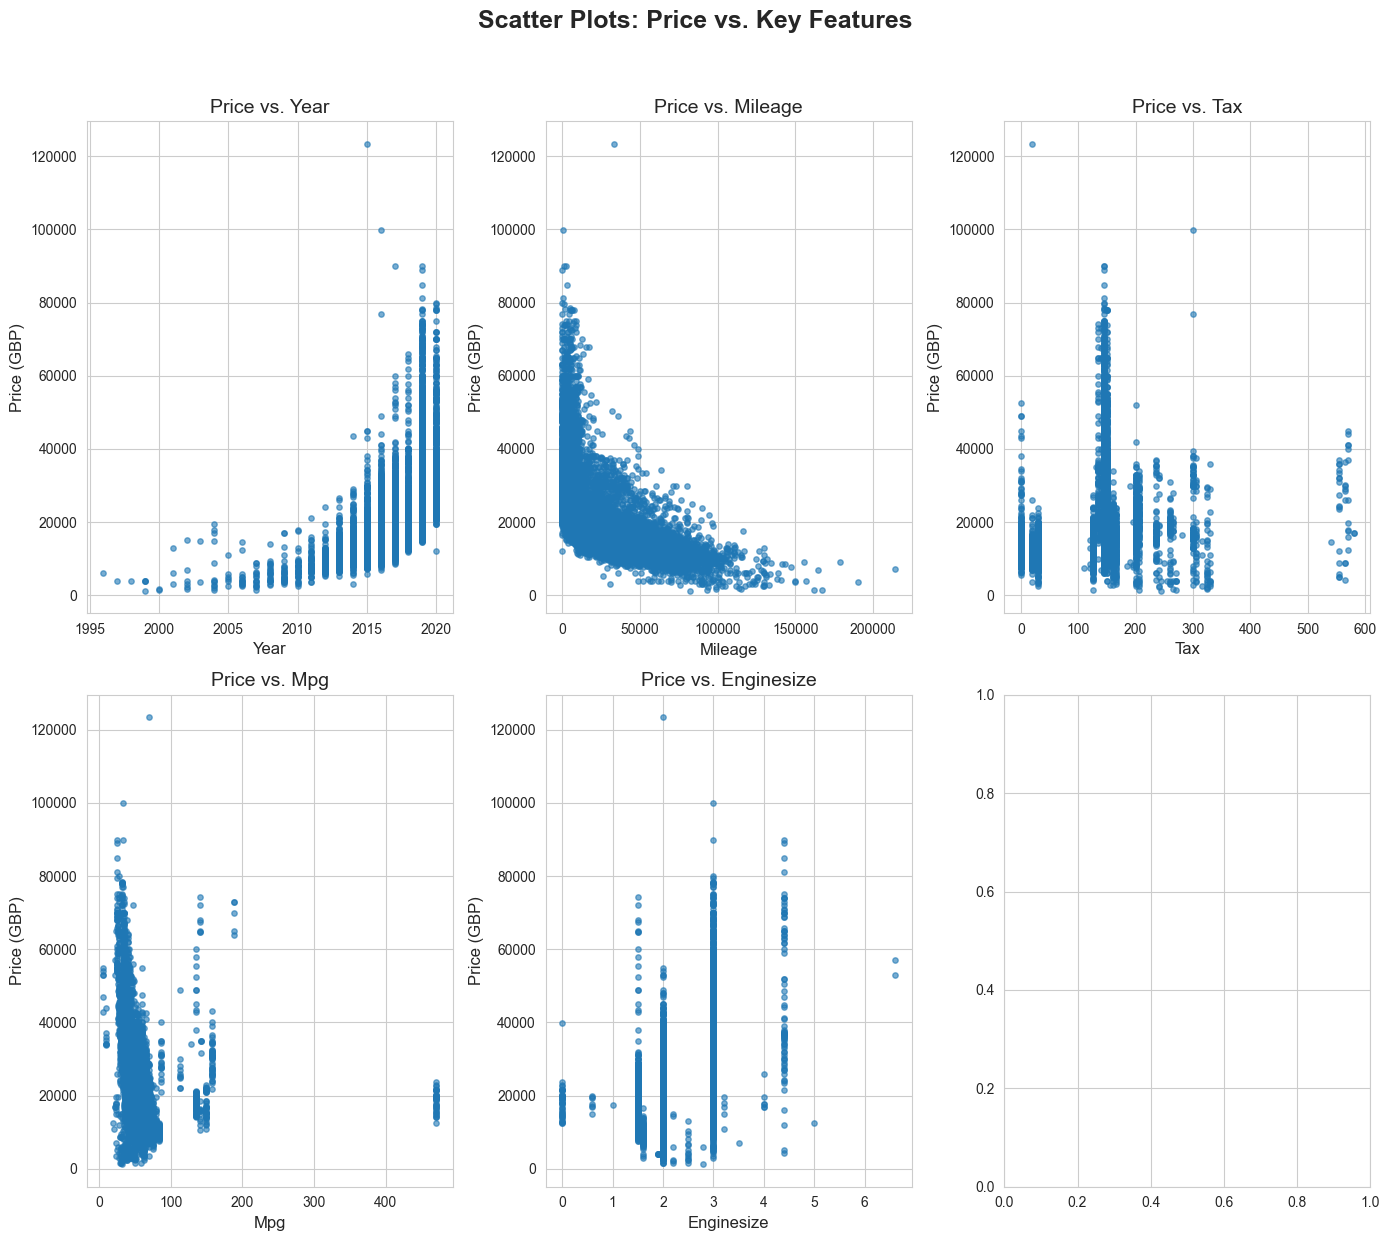

In [8]:
#scattering the realtion between price and other numerical features 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid") 

features = ['year', 'mileage', 'tax', 'mpg', 'engineSize']

fig, axes = plt.subplots(2, 3, figsize=(14, 12))
axes = axes.flatten()

fig.suptitle('Scatter Plots: Price vs. Key Features', fontsize=18, fontweight='bold', y=1.03)

for i, feature in enumerate(features):
    ax = axes[i]
    
    ax.scatter(data[feature], data['price'], alpha=0.6, s=15, color='#1f77b4') 
    
    ax.set_title(f'Price vs. {feature.capitalize()}', fontsize=14)
    ax.set_xlabel(feature.capitalize(), fontsize=12)
    ax.set_ylabel('Price (GBP)', fontsize=12)

plt.tight_layout()
plt.show()

In [9]:
# Check for missing values in each column
missing_values = data.isnull().sum()

print("--- Missing Values Count Per Column ---")
print(missing_values)

--- Missing Values Count Per Column ---
model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64


In [10]:
#Data is complete and there is no missing values

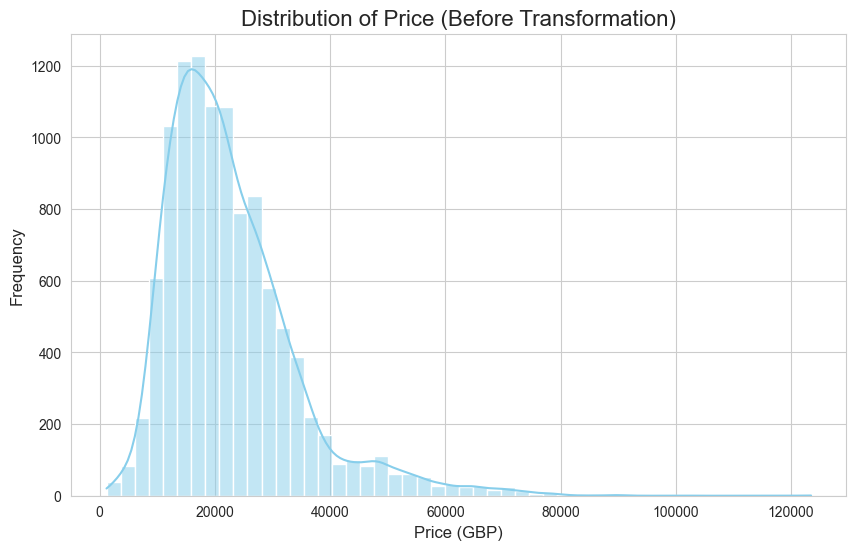

In [11]:
#check the distribution of the target variable 'price'
sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data['price'], kde=True, bins=50, color='skyblue')

plt.title('Distribution of Price (Before Transformation)', fontsize=16)
plt.xlabel('Price (GBP)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

plt.show()

In [12]:
#As shown above, the price distribution is right-skewed. So It's better to apply a log transformation to the 'price' column to reduce skewness and make the distribution more normal-like.

In [13]:
#Apply one hot encoding to the categorical features 'model', 'transmission', 'fuelType'